In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import functools
import numpy as np
import glob

In [3]:
labour_force_age = 'D:/Data Science Projects/Malaysia Statistics/04.Labour force by age group.xlsx'
labour_force_ethnic = 'D:/Data Science Projects/Malaysia Statistics/05.Labour force by ethnic group.xlsx'
labour_force_edu = 'D:/Data Science Projects/Malaysia Statistics/06.Labour force by educational attainment.xlsx'
labour_force_cert = 'D:/Data Science Projects/Malaysia Statistics/07.Labour force by highest certificate obtained.xls'
labour_force_marital = 'D:/Data Science Projects/Malaysia Statistics/08.Labour force by marital status.xls'
employed_age = 'D:/Data Science Projects/Malaysia Statistics/09.Employed persons by age group.xls'
employed_ethnic = 'D:/Data Science Projects/Malaysia Statistics/10.Employed persons by ethnic group.xls'
employed_edu = 'D:/Data Science Projects/Malaysia Statistics/14.Employed persons by educational attainment.xls'
employed_cert = 'D:/Data Science Projects/Malaysia Statistics/15.Employed persons by highest certificate obtained.xls'
employed_marital = 'D:/Data Science Projects/Malaysia Statistics/16.Employed persons by marital status.xls'

In [4]:
df_labour_force_age = pd.read_excel(labour_force_age, sheet_name = 0)
df_labour_force_ethnic = pd.read_excel(labour_force_ethnic, sheet_name = 0)
df_labour_force_edu = pd.read_excel(labour_force_edu, sheet_name = 0)
df_labour_force_cert = pd.read_excel(labour_force_cert, sheet_name = 0)
df_labour_force_marital = pd.read_excel(labour_force_marital, sheet_name = 0)
df_employed_age = pd.read_excel(employed_age, sheet_name = 0)
df_employed_ethnic = pd.read_excel(employed_ethnic, sheet_name = 0)
df_employed_edu = pd.read_excel(employed_edu, sheet_name = 0)
df_employed_cert = pd.read_excel(employed_cert, sheet_name = 0)
df_employed_marital = pd.read_excel(employed_marital, sheet_name = 0)

In [5]:
df_labour_force_ethnic.rename(columns={'Total.1': 'Total citizens'}, inplace = True)
df_employed_ethnic.rename(columns={'Total.1': 'Total citizens'}, inplace= True)
df_labour_force_cert.replace('-',np.NaN, regex=True, inplace= True)
df_employed_cert.replace('-',np.NaN, regex=True, inplace= True)

In [6]:
df_employed_marital

,Year,Total,Never married,Married,Widowed,Divorced/permanently separated
0,1982,5249.0,1794.4,3247.4,143.2,63.9
1,1983,5457.0,1838.9,3401.7,142.6,73.8
2,1984,5566.7,1875.9,3473.1,146.9,70.9
3,1985,5653.4,1921.0,3518.1,146.7,67.6
4,1986,5760.1,1954.6,3595.4,140.4,69.8
5,1987,5983.9,2029.2,3727.7,147.5,79.6
6,1988,6157.2,2098.4,3834.3,141.8,82.6
7,1989,6390.9,2223.9,3948.2,144.7,74.1
8,1990,6685.0,2389.5,4069.8,149.2,75.4
9,1992,7047.8,2503.1,4289.3,160.5,89.9


In [7]:
df_unemployed_age = df_labour_force_age.set_index('Year').subtract(df_employed_age.set_index('Year'), fill_value=0)
df_unemployed_ethnic = df_labour_force_ethnic.set_index('Year').subtract(df_employed_ethnic.set_index('Year'), fill_value=0)
df_unemployed_edu = df_labour_force_edu.set_index('Year').subtract(df_employed_edu.set_index('Year'), fill_value=0)
df_unemployed_cert = df_labour_force_cert.set_index('Year').subtract(df_employed_cert.set_index('Year'), fill_value=0)
df_unemployed_marital = df_labour_force_marital.set_index('Year').subtract(df_employed_marital.set_index('Year'), fill_value=0)

In [8]:
df_unemployed_age

,Total,15–19,20–24,25–29,30–34,35–39,40–44,45–49,50–54,55–59,60–64
Year,,,,,,,,,,,
1982,182.4,79.7,62.5,15.8,5.5,5.0,4.2,2.9,2.5,2.7,1.6
1983,214.8,87.3,70.3,22.5,8.3,5.8,4.0,5.2,4.3,4.5,2.7
1984,295.8,117.6,102.3,24.4,13.4,9.4,7.0,6.8,5.5,5.8,3.7
1985,336.7,123.3,118.0,32.7,17.4,11.9,8.7,8.6,6.5,5.7,4.0
1986,462.0,155.8,164.1,50.9,27.6,18.4,11.9,11.3,9.4,8.0,4.5
1987,472.9,167.7,165.1,51.0,24.2,16.2,13.9,12.8,9.2,8.3,4.5
1988,479.8,168.2,177.2,50.5,26.3,17.7,12.3,10.3,7.5,7.3,2.6
1989,388.5,140.0,135.0,44.4,19.2,12.8,8.7,8.4,9.0,6.8,4.4
1990,315.2,122.9,105.1,34.7,16.9,8.8,8.2,5.9,4.8,4.5,3.2


In [9]:
df_unemployed_age.iloc[-1:, 1:11].sum()

15–19     86.7
20–24    227.3
25–29    160.8
30–34     74.1
35–39     53.5
40–44     22.5
45–49     24.0
50–54     24.2
55–59     21.4
60–64     16.4
dtype: float64

In [10]:
df_unemployed_age.columns[1:11]

Index(['15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49', '50–54',
       '55–59', '60–64'],
      dtype='object')

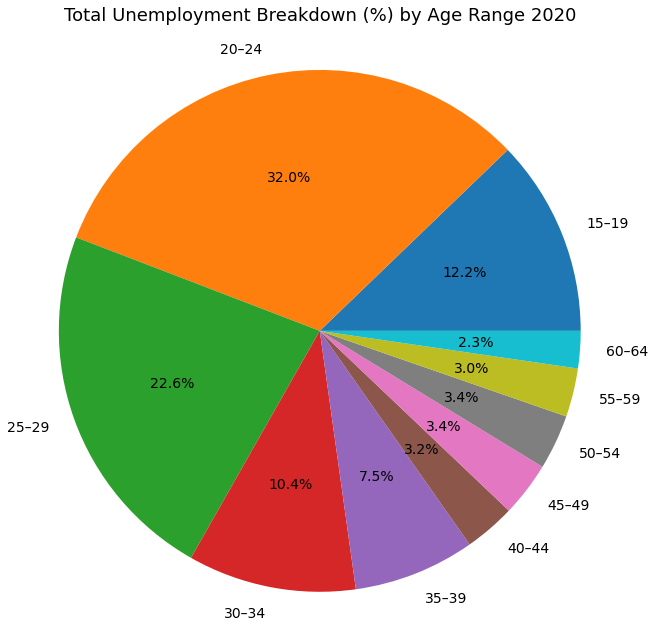

In [11]:
plt.pie(df_unemployed_age.iloc[-1:, 1:11].sum(), labels = df_unemployed_age.columns[1:11], autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Total Unemployment Breakdown (%) by Age Range 2020',y=1.9, fontsize=18)
plt.show()

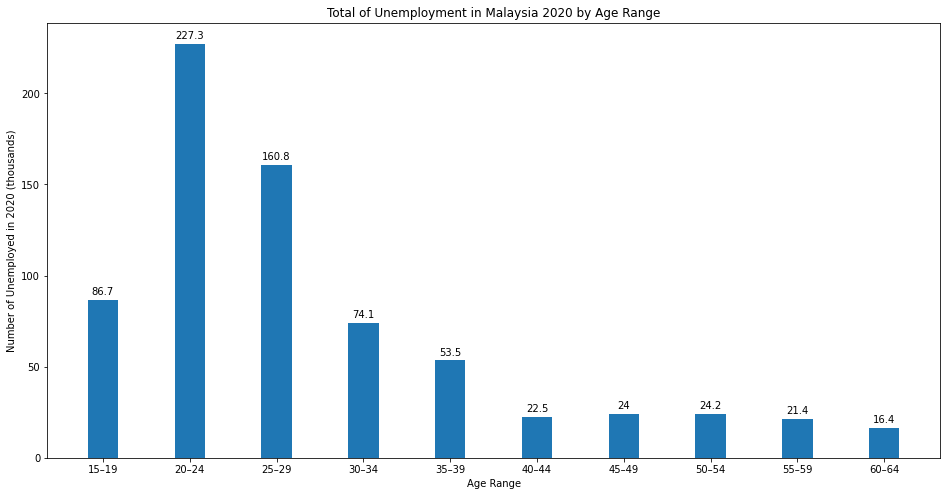

In [47]:
x = df_unemployed_age.columns[1:11]
h = df_unemployed_age.iloc[-1:, 1:11].sum()
widthbar = 0.35

fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Total of Unemployment in Malaysia 2020 by Age Range')
bar1 = plt.bar(x, h, width=widthbar )
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Unemployed in 2020 (thousands)')
ax.bar_label(bar1, padding=3)

plt.show()

In [12]:
df_unemployed_ethnic.iloc[-1:,2:7]

,Bumiputera,Chinese,Indians,Others,Non Malaysian citizens
Year,,,,,
2020,404.6,143.4,61.4,9.6,92.1


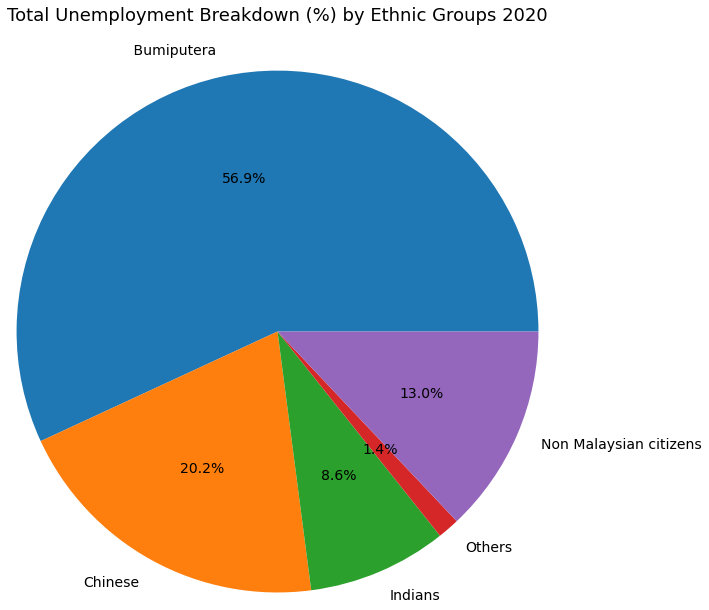

In [13]:
plt.pie(df_unemployed_ethnic.iloc[-1:,2:7].sum(), labels = df_unemployed_ethnic.columns[2:7], autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Total Unemployment Breakdown (%) by Ethnic Groups 2020',y=1.9, fontsize=18)
plt.show()

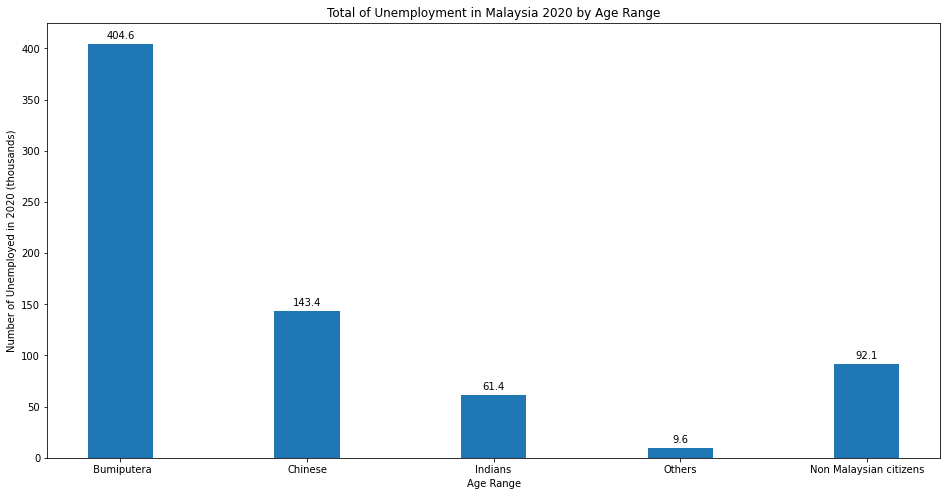

In [48]:
x = df_unemployed_ethnic.columns[2:7]
h = df_unemployed_ethnic.iloc[-1:,2:7].sum()
widthbar = 0.35

fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Total of Unemployment in Malaysia 2020 by Ethnic Groups')
bar1 = plt.bar(x, h, width=widthbar )
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Unemployed in 2020 (thousands)')
ax.bar_label(bar1, padding=3)

plt.show()

In [14]:
df_unemployed_edu.iloc[-1:,1:5]

,No formal education,Primary,Secondary,Tertiary
Year,,,,
2020,24.1,62.0,389.2,235.7


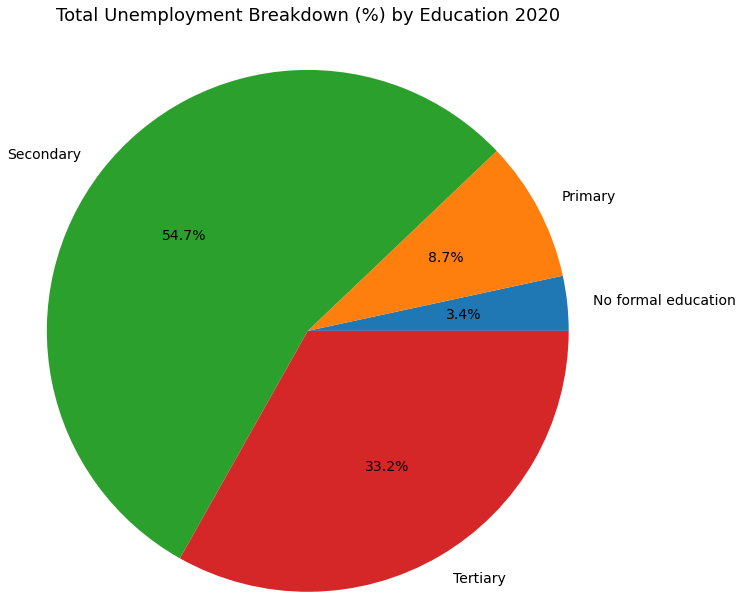

In [15]:
plt.pie(df_unemployed_edu.iloc[-1:,1:5].sum(), labels = df_unemployed_edu.columns[1:5], autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Total Unemployment Breakdown (%) by Education 2020',y=1.9, fontsize=18)
plt.show()

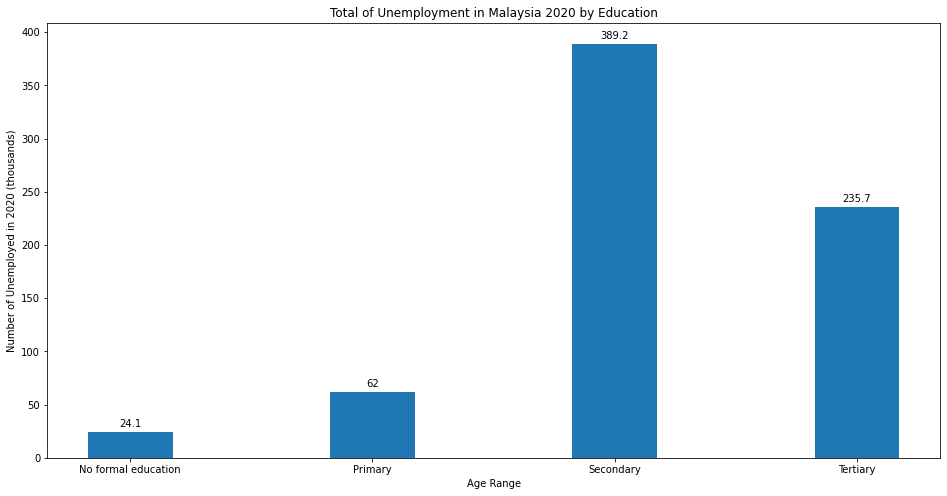

In [54]:
x = df_unemployed_edu.columns[1:5]
h = df_unemployed_edu.iloc[-1:,1:5].sum()
widthbar = 0.35

fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Total of Unemployment in Malaysia 2020 by Education')
bar1 = plt.bar(x, h, width=widthbar )
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Unemployed in 2020 (thousands)')
ax.bar_label(bar1, padding=3)

plt.show()

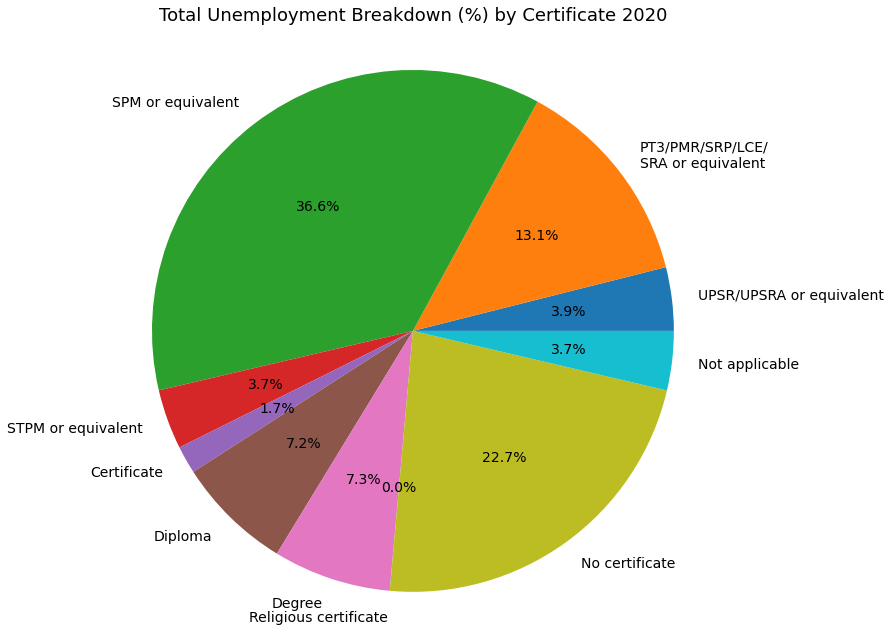

In [17]:
df_unemployed_cert.loc[:, df_unemployed_cert.columns != 'Total']
plt.pie(df_unemployed_cert.loc[-1:, df_unemployed_cert.columns != 'Total'].sum(), labels = df_unemployed_cert.loc[:, df_unemployed_cert.columns != 'Total'].columns, autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Total Unemployment Breakdown (%) by Certificate 2020',y=1.9, fontsize=18)
plt.show()

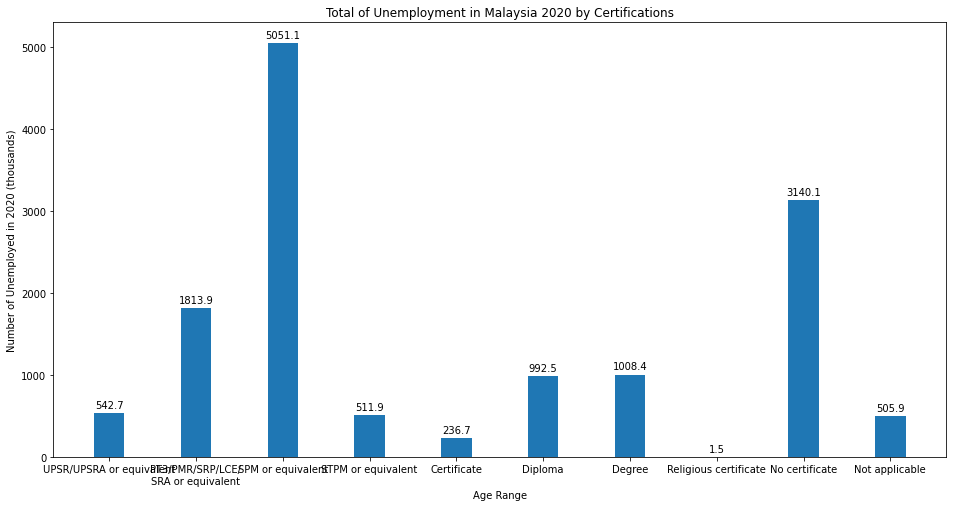

In [57]:
x = df_unemployed_cert.loc[:, df_unemployed_cert.columns != 'Total'].columns
h = df_unemployed_cert.loc[-1:, df_unemployed_cert.columns != 'Total'].sum()
widthbar = 0.35

fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Total of Unemployment in Malaysia 2020 by Certifications')
bar1 = plt.bar(x, h, width=widthbar )
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Unemployed in 2020 (thousands)')
ax.bar_label(bar1, padding=3)

plt.show()

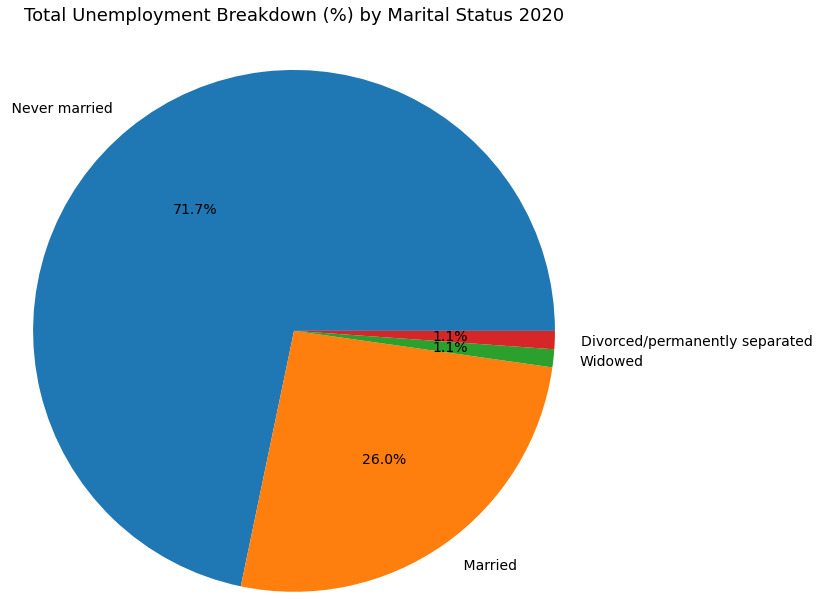

In [55]:
df_unemployed_marital.loc[-1:, df_unemployed_marital.columns != 'Total'].iloc[-1:,:]
plt.pie(df_unemployed_marital.loc[-1:, df_unemployed_marital.columns != 'Total'].iloc[-1:,:].sum(), labels = df_unemployed_marital.loc[-1:, df_unemployed_marital.columns != 'Total'].iloc[-1:,:].columns, autopct= '%1.1f%%', radius = 3, textprops={'fontsize': 14})
plt.title('Total Unemployment Breakdown (%) by Marital Status 2020',y=1.9, fontsize=18)
plt.show()

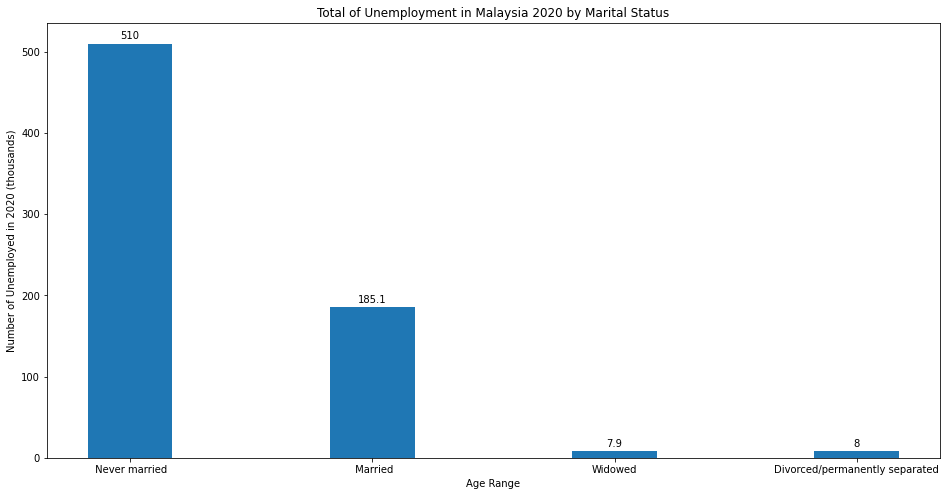

In [58]:
x = df_unemployed_marital.loc[-1:, df_unemployed_marital.columns != 'Total'].iloc[-1:,:].columns
h = df_unemployed_marital.loc[-1:, df_unemployed_marital.columns != 'Total'].iloc[-1:,:].sum()
widthbar = 0.35

fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Total of Unemployment in Malaysia 2020 by Marital Status')
bar1 = plt.bar(x, h, width=widthbar )
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Unemployed in 2020 (thousands)')
ax.bar_label(bar1, padding=3)

plt.show()